In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# 1. Load Data
df = pd.read_csv('../data/processed/market_features.csv', index_col=0, parse_dates=True)

# We fit GARCH on Returns (multiplied by 100 for better convergence stability)
returns = df['SPY_Log_Ret'].dropna() * 100

# 2. Define the Model
# 'GARCH(1,1)' means 1 lag of volatility and 1 lag of error. This is the industry standard.
# vol='Garch': We are modeling volatility.
# p=1, q=1: The standard parameters.
model = arch_model(returns, vol='Garch', p=1, q=1)

# 3. Fit the Model
results = model.fit(disp='off') # disp='off' hides the iteration logs

# 4. Print Summary
print(results.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:            SPY_Log_Ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1434.62
Distribution:                  Normal   AIC:                           2877.25
Method:            Maximum Likelihood   BIC:                           2896.70
                                        No. Observations:                  957
Date:                Sat, Dec 27 2025   Df Residuals:                      956
Time:                        23:07:28   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0801  3.233e-02      2.476  1.327e-02 [1.669e-0

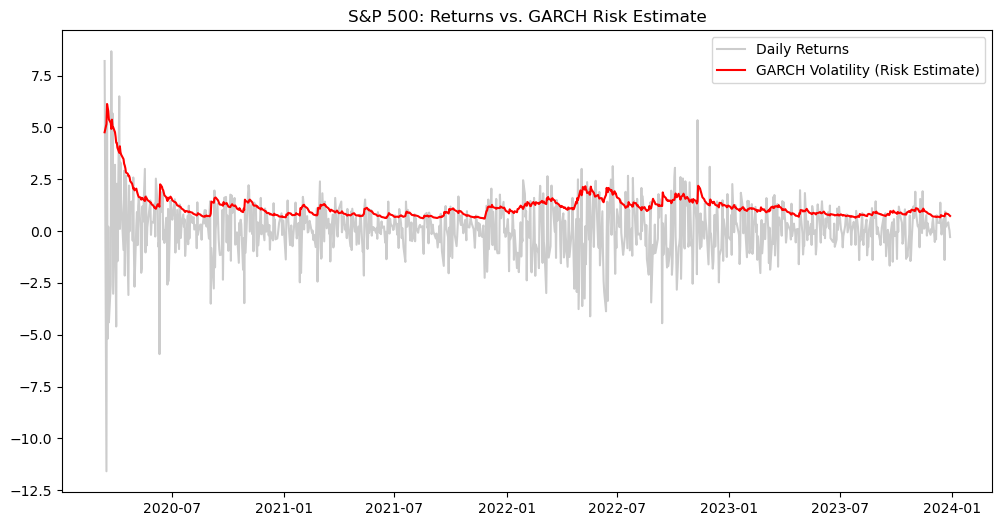

In [5]:
# 1. Get the estimated volatility (Conditional Volatility)
# The model outputs variance, so we take the square root to get Volatility (Std Dev)
df['Conditional_Vol'] = results.conditional_volatility

# 2. Plot Actual Returns vs. Estimated Risk
plt.figure(figsize=(12, 6))

# Plot Returns (Grey noise)
plt.plot(df.index, returns, color='grey', alpha=0.4, label='Daily Returns')

# Plot GARCH Volatility (Red line of Risk)
plt.plot(df.index, df['Conditional_Vol'], color='red', label='GARCH Volatility (Risk Estimate)')

plt.title("S&P 500: Returns vs. GARCH Risk Estimate")
plt.legend()
plt.show()

In [18]:
# Forecast the next 5 days of volatility
forecasts = results.forecast(horizon=5)

# Extract the variance forecast and convert to standard deviation (volatility)
next_5_days_var = forecasts.variance.iloc[-1]
next_5_days_vol = np.sqrt(next_5_days_var)

print("------------------------------------------------")
print("📉 Volatility Forecast for Next 5 Days:")
print("------------------------------------------------")
print(next_5_days_vol)

# Interpretation
current_vol = next_5_days_vol.iloc[0]
if current_vol > 2.0:
    print(f"\n⚠️ RISK ALERT: Volatility is High ({current_vol:.2f}% daily). Tighten Margins.")
else:
    print(f"\n✅ Market Status: Normal Volatility ({current_vol:.2f}% daily).")

------------------------------------------------
📉 Volatility Forecast for Next 5 Days:
------------------------------------------------
h.1    0.713401
h.2    0.727782
h.3    0.741467
h.4    0.754504
h.5    0.766940
Name: 2023-12-29 00:00:00, dtype: float64

✅ Market Status: Normal Volatility (0.71% daily).
